## Imports

In [1]:
import pandas as pd
import os
import numpy as np

# Step 1: Dataset path from download
dataset_path = "/Users/husnainsyed/.cache/kagglehub/datasets/arevel/chess-games/versions/1"

# Find the CSV file
csv_file = next(f for f in os.listdir(dataset_path) if f.endswith(".csv"))
csv_path = os.path.join(dataset_path, csv_file)

# Load a memory-friendly subset (all columns)
df = pd.read_csv(
    csv_path 
)




In [2]:
df.dtypes


Event               object
White               object
Black               object
Result              object
UTCDate             object
UTCTime             object
WhiteElo             int64
BlackElo             int64
WhiteRatingDiff    float64
BlackRatingDiff    float64
ECO                 object
Opening             object
TimeControl         object
Termination         object
AN                  object
dtype: object

In [3]:
# Count NaNs in the column
nan_count = df.isna().sum()
print(f"Number of missing WhiteRatingDiff values: {nan_count}")


Number of missing WhiteRatingDiff values: Event                 0
White                 0
Black                 0
Result                0
UTCDate               0
UTCTime               0
WhiteElo              0
BlackElo              0
WhiteRatingDiff    4668
BlackRatingDiff    4668
ECO                   0
Opening               0
TimeControl           0
Termination           0
AN                    0
dtype: int64


In [4]:
# Show rows where WhiteRatingDiff is NaN in the original df
df_nan = df[df['WhiteRatingDiff'].isna()]
print(df_nan.head())  # show first few rows
print(df_nan.index.tolist())  # indices of the NaN rows


            Event               White           Black Result     UTCDate  \
205        Blitz         irakli112233      irakli1811    1-0  2016.06.30   
388        Blitz         irakli112233      irakli1811    1-0  2016.06.30   
3352       Blitz              ZUMOSOL  pawnimpact0007    1-0  2016.06.30   
4452   Classical   IvanIsPlayingChess    ChessCurry30    0-1  2016.06.30   
4564       Blitz          MagusMaster  pawnimpact0007    1-0  2016.06.30   

       UTCTime  WhiteElo  BlackElo  WhiteRatingDiff  BlackRatingDiff  ECO  \
205   22:00:54      1500      1500              NaN              NaN  A00   
388   22:01:59      1500      1500              NaN              NaN  C57   
3352  22:19:53      2180      1393              NaN              NaN  A40   
4452  22:26:54      1640      2443              NaN              NaN  B10   
4564  22:27:45      2238      1393              NaN              NaN  A40   

                                                Opening TimeControl  \
205      

In [5]:
# Show rows where WhiteRatingDiff is NaN
# Replace NaN with 0 in specific columns
df['WhiteRatingDiff'] = df['WhiteRatingDiff'].fillna(0)
df['BlackRatingDiff'] = df['BlackRatingDiff'].fillna(0)


In [6]:
# Show rows where WhiteRatingDiff is NaN in the original df
df_nan = df[df['WhiteRatingDiff'].isna()]
print(df_nan.head())  # show first few rows
print(df_nan.index.tolist())  # indices of the NaN rows


Empty DataFrame
Columns: [Event, White, Black, Result, UTCDate, UTCTime, WhiteElo, BlackElo, WhiteRatingDiff, BlackRatingDiff, ECO, Opening, TimeControl, Termination, AN]
Index: []
[]


### Checking for any duplicates

In [7]:
len(df)

6256184

In [8]:
duplicates = df[df.duplicated()]
print(duplicates)


          Event     White      Black Result     UTCDate   UTCTime  WhiteElo  \
369577   Blitz   toinhoxd  Alajandro    0-1  2016.07.02  19:17:26      1482   

        BlackElo  WhiteRatingDiff  BlackRatingDiff  ECO            Opening  \
369577      1667             -5.0              5.0  C00  French Defense #2   

       TimeControl   Termination            AN  
369577       300+0  Time forfeit  1. e4 e6 0-1  


In [9]:
# Removing duplicates and checking to see if they have been removed
df = df.drop_duplicates()
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Event, White, Black, Result, UTCDate, UTCTime, WhiteElo, BlackElo, WhiteRatingDiff, BlackRatingDiff, ECO, Opening, TimeControl, Termination, AN]
Index: []


### I noticed there were whitespaces before and after string values, removing these from all columns

In [10]:
# Only apply to columns with dtype 'object' (strings)
str_cols = df.select_dtypes(include=['object']).columns

# Strip whitespace for all of them
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())


In [11]:
df['Event'].unique()


array(['Classical', 'Blitz', 'Blitz tournament', 'Correspondence',
       'Classical tournament', 'Bullet tournament', 'Bullet'],
      dtype=object)

In [14]:
df_event.head(2)

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...


### So what is chess's most important format? Everyone that ESPN has spoken to on the sidelines of the Chennai Grand Masters has a unanimous verdict - classical. That's where every chess player wants to be world champion. (https://www.espn.co.uk/chess/story/_/id/45963789/which-chess-most-important-format-frequent-switching-raises-questions,Aug 13, 2025, 03:10 PM)

In [13]:
# Classical games are the standard format of chess and will be used as the reference for this analysis.
df_event = df[df['Event']=='Classical'].copy()

### As in the Analysis we are looking for opening that will help white win, the result should be towards white

- Result: Game Result (1-0 White wins) (0-1 Black wins)

In [15]:
df_event['output'] = np.where(df_event['Result'] == '1-0', 1, 0)

In [16]:
df_event.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,output
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,1
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...,0
11,Classical,fabikim,sereno,1-0,2016.06.30,22:00:02,1630,1500,7.0,-7.0,C41,Philidor Defense #3,420+5,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...,1
59,Classical,dvs15lsa,xrap35,1-0,2016.06.30,22:00:03,1635,1572,9.0,-10.0,C54,"Italian Game: Classical Variation, Greco Gambi...",300+8,Normal,1. e4 e5 2. Bc4 Nc6 3. Nf3 Bc5 4. c3 Nf6 5. d4...,1
64,Classical,Yose_Luiz,rafaelvega,0-1,2016.06.30,22:00:04,1547,1618,-9.0,9.0,C46,Four Knights Game: Italian Variation,1200+1,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bb4 5. Q...,0


### As the  chess data has many variables, one very important variable is Elo, this is the rating. It is expected higher rating means more chances of winning. I will create bands based on the elo rating

| Rating Range | Category                                                     | Analysis Band                          |
|--------------|--------------------------------------------------------------|----------------------------------------|
| 2700+        | Informally termed as ‘Super Grandmasters’                    | Super Grandmasters                     |
| 2500–2700    | Most Grandmasters (GM)                                       | Grandmasters                           |
| 2400–2500    | Most International Masters (IMs) and some GMs                | Grandmasters                           |
| 2300–2400    | Most FIDE Masters (FMs) and some IMs                          | National & International Masters       |
| 2200–2300    | FIDE Candidate Masters (CMs), some National Masters (NMs)    | Candidate Masters                      |
| 2000–2200    | Candidate Masters (CMs)                                      | Candidate Masters                      |
| 1800–2000    | Class A, category 1                                          | Intermediate / Advanced Club Players   |
| 1600–1800    | Class B, category 2                                          | Intermediate / Advanced Club Players   |
| 1400–1600    | Class C, category 3                                          | Novice                      |
| 1200–1400    | Class D, category 4                                          | Novice                      |
| Below 1200   | Novices                                                      | Beginner                            |

(https://squareoffnow.com/blog/chess-ranking-system/?srsltid=AfmBOooSHqtiJMI7quZTvrIdvd08mv15nIz4a6OUrN2_jXXeyeuwIfhE, 2023)



In [17]:
conditions = [
    df_event["WhiteElo"] < 1200,
    df_event["WhiteElo"].between(1200, 1599),
    df_event["WhiteElo"].between(1600, 1999),
    df_event["WhiteElo"].between(2000, 2299),
    df_event["WhiteElo"].between(2300, 2399),
    df_event["WhiteElo"].between(2400, 2699),
    df_event["WhiteElo"] >= 2700
]

choices = [
    "Beginners",
    "Novice",
    "Intermediate",
    "Candidate Masters",
    "National & International Masters",
    "Grandmasters",
    "Super Grandmasters"
]

# Add default string to avoid dtype conflict
df_event["Band"] = np.select(conditions, choices, default="Unknown")


In [18]:
df_event.head(5)

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,output,Band
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,1,Intermediate
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...,0,Intermediate
11,Classical,fabikim,sereno,1-0,2016.06.30,22:00:02,1630,1500,7.0,-7.0,C41,Philidor Defense #3,420+5,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...,1,Intermediate
59,Classical,dvs15lsa,xrap35,1-0,2016.06.30,22:00:03,1635,1572,9.0,-10.0,C54,"Italian Game: Classical Variation, Greco Gambi...",300+8,Normal,1. e4 e5 2. Bc4 Nc6 3. Nf3 Bc5 4. c3 Nf6 5. d4...,1,Intermediate
64,Classical,Yose_Luiz,rafaelvega,0-1,2016.06.30,22:00:04,1547,1618,-9.0,9.0,C46,Four Knights Game: Italian Variation,1200+1,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bb4 5. Q...,0,Novice


### The question “How many chess openings are there?” is both simple and complex. One can reasonably say that there are infinite possible openings, though the Oxford Companion to Chess lists only 1,327 named openings and variants. (https://chess-teacher.com/how-many-chess-openings-are-there/, )

Based off this i will make them generic in which all the version fall

In [19]:
len(df_event["Opening"].unique())

2637

In [20]:
df_event["Opening"].value_counts()


Opening
Van't Kruijs Opening                                       32894
Scandinavian Defense: Mieses-Kotroc Variation              27659
Sicilian Defense: Bowdler Attack                           27236
Philidor Defense #3                                        25354
Scandinavian Defense                                       25293
                                                           ...  
Pterodactyl Defense: Sicilian, Benoni Gambit                   1
Sicilian Defense: Scheveningen Variation, Tal Variation        1
Caro-Kann Defense: Scorpion-Horus Gambit                       1
Gruenfeld Defense: Russian Variation, Prins Variation          1
Nimzowitsch Defense: Wheeler Gambit                            1
Name: count, Length: 2637, dtype: int64

In [22]:
opening_df = df_event.groupby("Opening").agg(
    games=("Opening", "count"),
    win_rate=("output", "mean"),
    avg_white_elo=("WhiteElo", "mean")
).sort_values("games", ascending=False)
opening_df.head()

,games,win_rate,avg_white_elo
Opening,,,
Van't Kruijs Opening,32894,0.418678,1539.186265
Scandinavian Defense: Mieses-Kotroc Variation,27659,0.601106,1685.106439
Sicilian Defense: Bowdler Attack,27236,0.429248,1694.996182
Philidor Defense #3,25354,0.563067,1677.346099
Scandinavian Defense,25293,0.447555,1540.010991


In [23]:
opening_df_new = opening_df[opening_df["games"] >= 3000]
openings_list = opening_df_new.index.tolist()

len(openings_list)


110

### Long (1997) suggests that maximum likelihood estimation including logistic regression with less 100 cases is “risky,” that 500 cases is generally “adequate,” and there should be at least 10 cases per predictor.

For this analysis i will look for openings that have above 3000 games

In [24]:
import numpy as np

#https://www.chess.com/openings most common openings

# List of most common named chess openings
common_openings = openings_list


# Generate conditions for np.select
conditions = [df_event['Opening'].str.contains(opening, case=False, na=False) for opening in common_openings]

# Apply mapping
df_event['Opening_Category'] = np.select(conditions, common_openings, default='Other')

# Quick check
print(df_event['Opening_Category'].value_counts())


/var/folders/r_/3g1m8dfj4kqgd9pqq6jyqd780000gn/T/ipykernel_52026/3412507915.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  conditions = [df_event['Opening'].str.contains(opening, case=False, na=False) for opening in common_openings]


Opening_Category
Other                                                    262709
Sicilian Defense                                         133151
Queen's Pawn Game                                         65914
Bishop's Opening                                          52063
King's Pawn Game                                          47335
                                                          ...  
Saragossa Opening                                          3246
French Defense: Advance Variation, Nimzowitsch System      3201
Mikenas Defense                                            3178
French Defense: Queen's Knight                             3131
Englund Gambit Declined, Reversed French                   3089
Name: count, Length: 71, dtype: int64


In [25]:
final_df = df_event[df_event['Opening_Category'] != 'Other'].copy()

In [27]:
final_df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN,output,Band,Opening_Category
10,Classical,DARDELU,chess4life54,0-1,2016.06.30,22:00:01,1649,1638,-13.0,11.0,C57,"Italian Game: Two Knights Defense, Traxler Cou...",900+3,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...,0,Intermediate,Italian Game
11,Classical,fabikim,sereno,1-0,2016.06.30,22:00:02,1630,1500,7.0,-7.0,C41,Philidor Defense #3,420+5,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...,1,Intermediate,Philidor Defense #3
59,Classical,dvs15lsa,xrap35,1-0,2016.06.30,22:00:03,1635,1572,9.0,-10.0,C54,"Italian Game: Classical Variation, Greco Gambi...",300+8,Normal,1. e4 e5 2. Bc4 Nc6 3. Nf3 Bc5 4. c3 Nf6 5. d4...,1,Intermediate,Italian Game
64,Classical,Yose_Luiz,rafaelvega,0-1,2016.06.30,22:00:04,1547,1618,-9.0,9.0,C46,Four Knights Game: Italian Variation,1200+1,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bb4 5. Q...,0,Novice,Four Knights Game: Italian Variation
76,Classical,Leonard7,owl-13,0-1,2016.06.30,22:00:10,1587,1614,-10.0,12.0,C50,"Italian Game: Giuoco Pianissimo, Normal",480+3,Time forfeit,1. e4 e5 2. Bc4 Bc5 3. Nf3 Nc6 4. d3 Nf6 5. Ng...,0,Novice,Italian Game


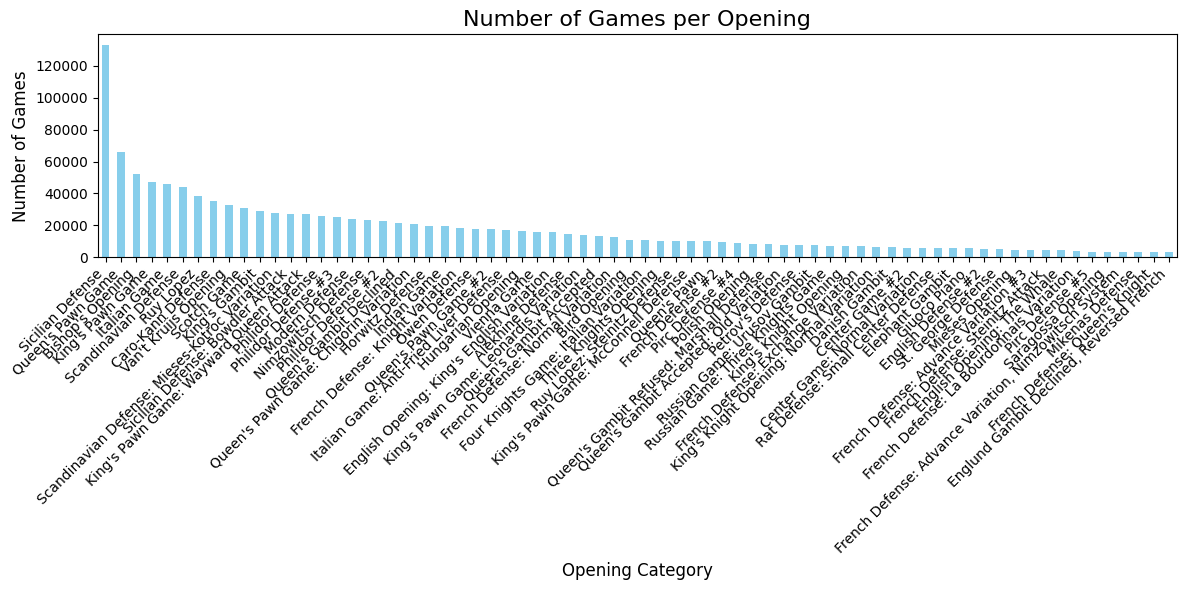

In [26]:
import matplotlib.pyplot as plt

# Count how many games per opening category
opening_counts = final_df['Opening_Category'].value_counts()

# Plot bar chart
plt.figure(figsize=(12,6))
opening_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Games per Opening', fontsize=16)
plt.xlabel('Opening Category', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
ratio_df = final_df.groupby("Opening_Category").agg(
    games=("Opening_Category", "count"),
    win_rate=("output", "mean"),
    avg_white_elo=("WhiteElo", "mean"),
    Band=("Band", lambda x: x.mode()[0])  # most frequent band for this opening
).sort_values("games", ascending=False)


ratio_df.head()

,games,win_rate,avg_white_elo,Band
Opening_Category,,,,
Sicilian Defense,133151,0.457466,1765.999925,Intermediate
Queen's Pawn Game,65914,0.481977,1682.432078,Intermediate
Bishop's Opening,52063,0.526516,1662.169967,Intermediate
King's Pawn Game,47335,0.491729,1569.688180,Novice
Italian Game,46012,0.519278,1711.751152,Intermediate


In [30]:
import plotly.express as px
import numpy as np

# Reset index if Opening_Category is the index
df_plot = ratio_df.reset_index()

# Scale bubble sizes using log for skewed data
df_plot['size'] = np.log(df_plot['games'])

# Choose top openings to annotate (largest by games)
top_openings = df_plot.nlargest(15, "games")

# Interactive bubble plot
fig = px.scatter(
    df_plot,
    x='avg_white_elo',
    y='win_rate',
    size='size',
    color='Band',  # colors by player strength
    hover_name='Opening_Category',
    hover_data={'games': True, 'avg_white_elo': True, 'win_rate': True, 'size': False},
    opacity=0.7,
    size_max=40
)

# Annotate top openings
for _, row in top_openings.iterrows():
    fig.add_annotation(
        x=row['avg_white_elo'],
        y=row['win_rate'],
        text=row['Opening_Category'],
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowcolor='black',
        font=dict(size=10)
    )

fig.update_layout(
    title="Opening Performance vs Player Strength",
    xaxis_title="Average White Elo",
    yaxis_title="White Win Rate",
    legend_title="Player Band",
    template="plotly_white"
)

fig.show()


<Axes: xlabel='Opening_Category'>

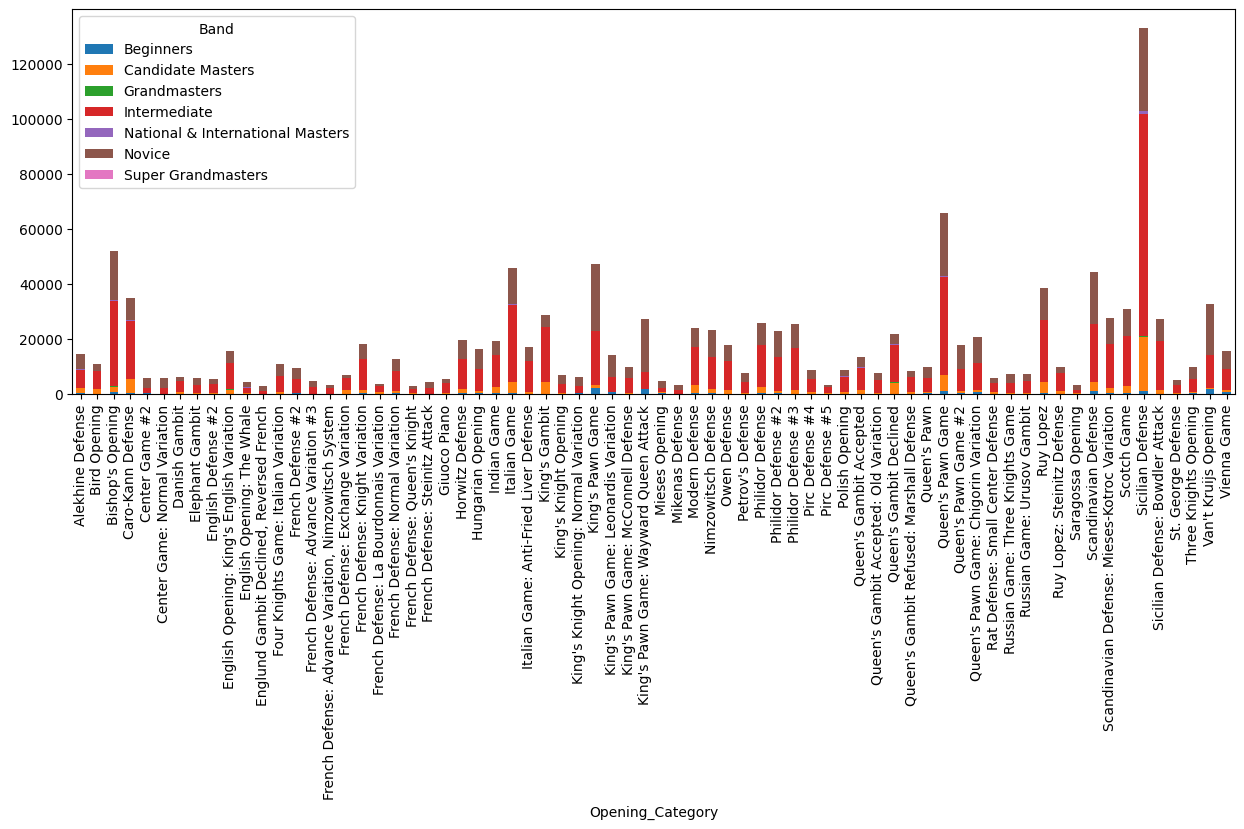

In [31]:
df_band_counts = final_df.groupby(['Opening_Category','Band']).size().unstack(fill_value=0)
df_band_counts.plot(kind='bar', stacked=True, figsize=(15,5))


In [39]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt


In [40]:
# Features: Opening_Category (categorical), WhiteElo, BlackElo
X = final_df[['Opening_Category', 'WhiteElo', 'BlackElo']]
y = final_df['output']  # 1 if White wins, 0 if not
